<a href="https://colab.research.google.com/github/FeitanPortor/Board/blob/main/Data_Science_Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science : Lab [5]

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer

### 1)Read the data set

In [38]:
odf = pd.read_csv('cars_sampled.csv')

In [39]:
odf

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30-03-2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30-03-2016 00:00,20257,07-04-2016 04:44
1,07-03-2016 09:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,07-03-2016 00:00,88045,26-03-2016 13:17
2,01-04-2016 00:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31-03-2016 00:00,27449,01-04-2016 08:40
3,19-03-2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19-03-2016 00:00,34537,07-04-2016 04:44
4,16-03-2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16-03-2016 00:00,55270,01-04-2016 23:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,03-04-2016 15:48,Suche_VW_T5_Multivan,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN,03-04-2016 00:00,29690,05-04-2016 15:16
49997,27-03-2016 14:55,Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN,27-03-2016 00:00,50181,07-04-2016 11:45
49998,14-03-2016 18:51,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no,14-03-2016 00:00,86956,25-03-2016 06:17
49999,15-03-2016 18:06,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN,15-03-2016 00:00,65232,06-04-2016 17:15


### 2)Make a deep copy of the dataset

In [40]:
df = odf.copy()
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30-03-2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30-03-2016 00:00,20257,07-04-2016 04:44
1,07-03-2016 09:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,07-03-2016 00:00,88045,26-03-2016 13:17
2,01-04-2016 00:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31-03-2016 00:00,27449,01-04-2016 08:40
3,19-03-2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19-03-2016 00:00,34537,07-04-2016 04:44
4,16-03-2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16-03-2016 00:00,55270,01-04-2016 23:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,03-04-2016 15:48,Suche_VW_T5_Multivan,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN,03-04-2016 00:00,29690,05-04-2016 15:16
49997,27-03-2016 14:55,Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN,27-03-2016 00:00,50181,07-04-2016 11:45
49998,14-03-2016 18:51,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no,14-03-2016 00:00,86956,25-03-2016 06:17
49999,15-03-2016 18:06,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN,15-03-2016 00:00,65232,06-04-2016 17:15


### 3)Get structure of the data and mention datatype of each column

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

### 4)Get summary of the data

In [42]:
df.head(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30-03-2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30-03-2016 00:00,20257,07-04-2016 04:44
1,07-03-2016 09:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,07-03-2016 00:00,88045,26-03-2016 13:17
2,01-04-2016 00:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31-03-2016 00:00,27449,01-04-2016 08:40
3,19-03-2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19-03-2016 00:00,34537,07-04-2016 04:44
4,16-03-2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16-03-2016 00:00,55270,01-04-2016 23:18
5,02-04-2016 12:51,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,private,offer,988,test,limousine,1995,manual,90,passat,150000,2,petrol,volkswagen,no,02-04-2016 00:00,26826,02-04-2016 12:51
6,03-04-2016 11:06,Opel_astra,private,offer,400,test,station wagon,1996,manual,0,astra,150000,5,petrol,opel,NaN,03-04-2016 00:00,56422,06-04-2016 16:47
7,24-03-2016 15:52,Mercedes_Benz_CLK_Coupe_200,private,offer,1399,test,coupe,1997,manual,136,clk,150000,11,petrol,mercedes_benz,no,24-03-2016 00:00,13353,27-03-2016 12:45
8,28-03-2016 14:40,Vectra_C_Caravan_1_8_Edition_Facelift_m_AHK_In...,private,offer,4680,test,station wagon,2005,manual,122,vectra,150000,12,petrol,opel,no,28-03-2016 00:00,28307,06-04-2016 18:19
9,05-04-2016 11:38,Skoda_Octavia_2.0_TDI_DSG_Elegance,private,offer,8340,test,limousine,2005,automatic,140,octavia,125000,4,diesel,skoda,no,05-04-2016 00:00,16761,05-04-2016 11:38


In [43]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


### 5)Round all the decimal values till 3 places after decimal only

In [44]:
round(df.describe(),3)

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6.559865e+03,2005.544,116.496,125613.688,5.744,50775.217
std,8.581847e+04,122.992,230.568,40205.234,3.711,25743.702
min,0.000000e+00,1000.000,0.000,5000.000,0.000,1067.000
25%,1.150000e+03,1999.000,69.000,125000.000,3.000,30559.000
50%,2.950000e+03,2003.000,105.000,150000.000,6.000,49504.000
75%,7.190000e+03,2008.000,150.000,150000.000,9.000,71404.000
max,1.234568e+07,9999.000,19312.000,150000.000,12.000,99998.000


### 6)Display all the columns of this dataset

In [45]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen'],
      dtype='object')

### 7)Drop unwanted columns [name, dateCrawled, dateCreated, PostalCode, lastSeen]

In [46]:
df = df.drop(columns=["name", "dateCrawled", "dateCreated", "postalCode", "lastSeen"], axis=1)
df

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN
49997,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN
49998,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no
49999,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN


### 8)Remove duplicate records keep first occurrence of this

In [47]:
df.drop_duplicates(keep='first')

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN
49997,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN
49998,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no
49999,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN


### 9)Sort YearofRegistration column based on index value

In [48]:
df = df.sort_values(by=['yearOfRegistration'])
display(df)

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
12768,private,offer,550,control,NaN,1000,NaN,1000,golf,5000,6,petrol,volkswagen,NaN
7150,private,offer,400,test,NaN,1000,NaN,0,NaN,5000,0,NaN,mercedes_benz,no
25449,private,offer,20,control,NaN,1000,NaN,0,156,5000,0,NaN,alfa_romeo,NaN
8027,private,offer,4750,control,NaN,1000,NaN,0,others,5000,0,NaN,renault,NaN
41464,private,offer,16500,control,NaN,1000,NaN,0,NaN,5000,0,NaN,sonstige_autos,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,private,offer,999999,control,NaN,9999,NaN,0,NaN,10000,0,NaN,bmw,NaN
47770,private,offer,19000,test,NaN,9999,NaN,0,transporter,10000,0,NaN,volkswagen,NaN
14406,private,offer,350,control,NaN,9999,NaN,0,kaefer,10000,1,NaN,volkswagen,NaN
6866,private,offer,7999,test,NaN,9999,NaN,0,kaefer,10000,0,NaN,volkswagen,NaN


### 10) Find the frequency of car based on price

In [49]:
freq = df.groupby(['price']).count()
display(freq)

,seller,offerType,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
price,,,,,,,,,,,,,
0,1451,1451,1451,919,1451,1082,1451,1160,1451,1451,966,1451,709
1,172,172,172,110,172,120,172,141,172,172,117,172,88
2,1,1,1,1,1,1,1,1,1,1,1,1,0
3,1,1,1,0,1,0,1,0,1,1,0,1,0
5,4,4,4,1,4,2,4,3,4,4,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250000,1,1,1,1,1,1,1,1,1,1,1,1,1
2795000,1,1,1,1,1,0,1,0,1,1,0,1,1
9999999,1,1,1,1,1,1,1,1,1,1,1,1,1


### 11) Find the frequency of car based on the PowerPS

In [50]:
freq = df.groupby(['powerPS']).count()
display(freq)

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
powerPS,,,,,,,,,,,,,
0,5605,5605,5605,5605,3534,5605,3662,4705,5605,5605,3937,5605,2631
1,3,3,3,3,3,3,1,2,3,3,1,3,1
2,2,2,2,2,1,2,1,1,2,2,2,2,1
3,2,2,2,2,2,2,2,0,2,2,2,2,1
4,4,4,4,4,4,4,4,0,4,4,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15033,1,1,1,1,1,1,1,1,1,1,1,1,1
16011,1,1,1,1,0,1,1,1,1,1,1,1,1
16312,1,1,1,1,1,1,1,1,1,1,1,1,1


### 12) Make sure the working range of data should be

 - YearOfRegistration < 2018 and YearOfRegistration>1950
 - Price >= 100 and Price < =150000
 - powerPS >=10 and PowerPS <= 500


In [51]:
yr = (df['yearOfRegistration'] > 1950) & (df['yearOfRegistration'] < 2018)
prc = (df['price'] >= 100) & (df['price'] <= 150000)
pwrps = (df['powerPS'] >= 10) & (df['powerPS'] < 500)
# Use the boolean mask to select only the rows that meet the criteria
df = df[yr]
df = df[prc]
df = df[pwrps]

df

<ipython-input-51-9deb78889a5d>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[prc]
<ipython-input-51-9deb78889a5d>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[pwrps]


,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
43408,private,offer,29900,test,cabrio,1951,manual,54,NaN,90000,9,petrol,sonstige_autos,no
31753,private,offer,17900,test,limousine,1951,manual,58,others,50000,6,petrol,citroen,no
30651,private,offer,4500,test,limousine,1951,NaN,39,others,80000,3,NaN,opel,no
45201,private,offer,3500,test,suv,1953,manual,72,others,150000,10,petrol,jeep,yes
9330,private,offer,11500,test,limousine,1954,NaN,150,others,125000,6,petrol,chevrolet,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11442,private,offer,700,test,NaN,2017,manual,120,147,150000,7,petrol,alfa_romeo,yes
48416,private,offer,175,control,NaN,2017,manual,75,corolla,90000,2,petrol,toyota,yes
8743,private,offer,1000,control,NaN,2017,NaN,75,NaN,150000,0,NaN,ford,NaN
25213,private,offer,777,control,NaN,2017,manual,75,vectra,70000,0,petrol,opel,no


### 13.Create new variable “Age” by adding YearOfRegistration and MonthOfRegistration considering 2018 is the current year.

In [52]:
# Calculate the age by subtracting the YearOfRegistration from the current year (2018)
df['Age'] = 2018 - df['yearOfRegistration'] + ((12 - df['monthOfRegistration']) / 12)

# Round the Age to 2 decimal places
df['Age'] = df['Age'].round(2)
df

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,Age
43408,private,offer,29900,test,cabrio,1951,manual,54,NaN,90000,9,petrol,sonstige_autos,no,67.25
31753,private,offer,17900,test,limousine,1951,manual,58,others,50000,6,petrol,citroen,no,67.50
30651,private,offer,4500,test,limousine,1951,NaN,39,others,80000,3,NaN,opel,no,67.75
45201,private,offer,3500,test,suv,1953,manual,72,others,150000,10,petrol,jeep,yes,65.17
9330,private,offer,11500,test,limousine,1954,NaN,150,others,125000,6,petrol,chevrolet,no,64.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11442,private,offer,700,test,NaN,2017,manual,120,147,150000,7,petrol,alfa_romeo,yes,1.42
48416,private,offer,175,control,NaN,2017,manual,75,corolla,90000,2,petrol,toyota,yes,1.83
8743,private,offer,1000,control,NaN,2017,NaN,75,NaN,150000,0,NaN,ford,NaN,2.00
25213,private,offer,777,control,NaN,2017,manual,75,vectra,70000,0,petrol,opel,no,2.00


### 14. Now check the statistics of data and explain.

In [53]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,Age
count,42751.000000,42751.000000,42751.000000,42751.000000,42751.000000,42751.000000
mean,6148.118126,2003.503240,126.216416,125737.994433,6.005661,14.996364
std,7906.461187,6.982949,60.275606,39105.096443,3.574617,6.997021
min,100.000000,1951.000000,10.000000,5000.000000,0.000000,1.000000
25%,1450.000000,1999.000000,80.000000,100000.000000,3.000000,10.420000
50%,3500.000000,2004.000000,116.000000,150000.000000,6.000000,14.830000
75%,7950.000000,2008.000000,150.000000,150000.000000,9.000000,19.170000
max,149000.000000,2017.000000,489.000000,150000.000000,12.000000,67.750000


### 15.   Drop yearOfRegistration and MonthOfRegistration columns

In [54]:
df = df.drop(columns=["yearOfRegistration", "monthOfRegistration"], axis=1)
display(df)

,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
43408,private,offer,29900,test,cabrio,manual,54,NaN,90000,petrol,sonstige_autos,no,67.25
31753,private,offer,17900,test,limousine,manual,58,others,50000,petrol,citroen,no,67.50
30651,private,offer,4500,test,limousine,NaN,39,others,80000,NaN,opel,no,67.75
45201,private,offer,3500,test,suv,manual,72,others,150000,petrol,jeep,yes,65.17
9330,private,offer,11500,test,limousine,NaN,150,others,125000,petrol,chevrolet,no,64.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11442,private,offer,700,test,NaN,manual,120,147,150000,petrol,alfa_romeo,yes,1.42
48416,private,offer,175,control,NaN,manual,75,corolla,90000,petrol,toyota,yes,1.83
8743,private,offer,1000,control,NaN,NaN,75,NaN,150000,NaN,ford,NaN,2.00
25213,private,offer,777,control,NaN,manual,75,vectra,70000,petrol,opel,no,2.00


### 16. Find the information about the variable seller with respect to price

In [55]:
grouped = df.groupby('seller')['price'].describe()
print(grouped)

              count         mean          std     min     25%     50%     75%  \
seller                                                                          
commercial      1.0  1100.000000          NaN  1100.0  1100.0  1100.0  1100.0   
private     42750.0  6148.236211  7906.515963   100.0  1450.0  3500.0  7950.0   

                 max  
seller                
commercial    1100.0  
private     149000.0  


### 17. Find the information about variable offerType with respect to price.

In [56]:
grouped = df.groupby('offerType')['price'].describe()
print(grouped)

             count         mean          std    min     25%     50%     75%  \
offerType                                                                     
offer      42751.0  6148.118126  7906.461187  100.0  1450.0  3500.0  7950.0   

                max  
offerType            
offer      149000.0  


<!-- ### 17. Find the information about variable offerType with respect to price. -->
### 18. Find the information about variable abtest with respect to price.
### 19. Find the information about variable vehicleType with respect to price.
### 20. Find the information about variable gearbox with respect to price. 
### 21. Find the information about variable model with respect to price.
### 22.  Find the information about variable Kilometer with respect to price. 
### 23. Find the information about FuelType with respect to price. 
### 24. Find the information about variable Brands with respect to price. 
### 25. Find the information about variable NotRepairedDamage with respect to price.

In [57]:
grouped = df.groupby('abtest')['price'].describe()
print(grouped)


           count         mean          std    min     25%     50%     75%  \
abtest                                                                      
control  20619.0  6114.084194  7822.711650  100.0  1480.0  3500.0  7900.0   
test     22132.0  6179.825411  7983.741022  100.0  1400.0  3499.0  7950.0   

              max  
abtest             
control  149000.0  
test     139000.0  


In [58]:
grouped = df.groupby('vehicleType')['price'].describe()
print(grouped)

                 count          mean           std    min     25%      50%  \
vehicleType                                                                  
bus             3624.0   7025.796634   7211.178059  100.0  2500.0   4825.0   
cabrio          2809.0  10563.746173  12935.479468  100.0  3450.0   6700.0   
coupe           2273.0  10802.767708  14026.971478  100.0  2300.0   5850.0   
limousine      11871.0   6112.337966   6892.157250  100.0  1500.0   3590.0   
others           328.0   4625.582317   6196.697816  100.0  1200.0   2800.0   
small car       9358.0   2965.300919   3223.103211  100.0   888.0   1790.0   
station wagon   8153.0   6052.576475   6462.744508  100.0  1600.0   3790.0   
suv             1843.0  13093.809007  10327.845065  100.0  5600.0  10900.0   

                   75%       max  
vehicleType                       
bus             8900.0  109000.0  
cabrio         13200.0  149000.0  
coupe          14990.0  139000.0  
limousine       8200.0   84000.0  
others   

In [59]:
grouped = df.groupby('gearbox')['price'].describe()
print(grouped)


             count          mean           std    min     25%     50%  \
gearbox                                                                 
automatic   9460.0  10696.177484  10851.723220  100.0  3000.0  7499.0   
manual     32524.0   4879.528102   6261.628008  100.0  1250.0  2890.0   

               75%       max  
gearbox                       
automatic  14900.0  138000.0  
manual      6350.0  149000.0  


In [60]:
grouped = df.groupby('model')['price'].describe()
print(grouped)

         count          mean          std     min       25%      50%      75%  \
model                                                                           
100       47.0   1764.787234  1678.322324   200.0    725.00   1200.0   1875.0   
145        4.0    481.250000   341.183602   125.0    256.25    450.0    675.0   
147       61.0   2599.655738  1808.770834   500.0   1100.00   2250.0   3500.0   
156       65.0   1586.738462  1118.499208   200.0    799.00   1350.0   1990.0   
159       19.0   7383.842105  3099.918158  3200.0   5350.00   6200.0   9150.0   
...        ...           ...          ...     ...       ...      ...      ...   
yaris    132.0   3709.409091  2542.401404   599.0   1686.75   2994.5   5212.5   
yeti      27.0  14952.592593  4457.167868  9900.0  11899.50  12900.0  16422.5   
ypsilon   22.0   1697.090909  1412.192113   160.0    899.25   1270.0   1924.0   
z_reihe  125.0  13196.528000  8912.893866  2600.0   6950.00  10800.0  14990.0   
zafira   327.0   3859.776758

In [61]:
grouped = df.groupby('kilometer')['price'].describe()
print(grouped)

             count          mean           std    min       25%      50%  \
kilometer                                                                  
5000         466.0  10072.656652  16128.297782  101.0   1100.00   3000.0   
10000        208.0  20411.153846  13626.721792  145.0  10875.00  17500.0   
20000        654.0  17671.685015  15998.095064  150.0   6950.00  13800.0   
30000        721.0  15937.030513  13385.888309  100.0   6990.00  12500.0   
40000        802.0  15297.761845  12453.009653  150.0   6950.00  12500.0   
50000        930.0  12950.337634  10984.109648  150.0   5999.00   9994.5   
60000       1125.0  12301.192889  10874.457337  150.0   5400.00   9800.0   
70000       1182.0  10889.441624   9595.646998  150.0   4392.25   8494.5   
80000       1378.0   9841.520319   9443.031501  150.0   3812.50   7275.0   
90000       1483.0   8953.022927   8507.586667  100.0   3099.50   6450.0   
100000      1835.0   8105.641962   8765.399357  100.0   2594.50   5800.0   
125000      

In [62]:
grouped = df.groupby('fuelType')['price'].describe()
print(grouped)


            count          mean           std     min       25%      50%  \
fuelType                                                                   
cng          71.0   5200.957746   3308.724650  1000.0   2475.00   3600.0   
diesel    12966.0   8874.823538   8248.526135   100.0   3200.00   6390.0   
electro      10.0   9138.700000   9000.990847  1000.0   5424.00   6049.5   
hybrid       36.0  15892.694444  11191.077417   350.0  10174.75  13949.5   
lpg         693.0   4635.590188   4122.281835   100.0   1999.00   3500.0   
other         6.0   6325.000000   5631.496249  2500.0   3612.50   3975.0   
petrol    26524.0   5109.403823   7693.847067   100.0   1100.00   2500.0   

              75%       max  
fuelType                     
cng        8175.0   13999.0  
diesel    11999.0  109000.0  
electro    9600.0   33590.0  
hybrid    17775.0   62900.0  
lpg        6000.0   39000.0  
other      5875.0   17500.0  
petrol     6200.0  149000.0  


In [63]:
grouped = df.groupby('brand')['price'].describe()
print(grouped)


                 count          mean           std     min       25%      50%  \
brand                                                                           
alfa_romeo       248.0   4384.512097   6119.980790   125.0   1250.00   2600.0   
audi            3995.0   9198.837046   9274.994522   130.0   2400.00   6499.0   
bmw             4894.0   8525.508173   8309.348539   100.0   2600.00   6000.0   
chevrolet        211.0   6848.981043   6331.351302   300.0   2400.00   4900.0   
chrysler         152.0   5043.486842   5217.243812   200.0   1500.00   3147.5   
citroen          595.0   3897.783193   4018.329532   100.0   1299.50   2700.0   
dacia            124.0   5409.919355   3545.433735   650.0   2737.50   4375.0   
daewoo            53.0   1106.943396    664.497451   100.0    600.00   1000.0   
daihatsu          67.0   2181.492537   2414.191648   100.0    750.00   1399.0   
fiat             990.0   3209.235354   3865.278605   100.0    812.25   1800.0   
ford            2807.0   398

In [64]:
grouped = df.groupby('notRepairedDamage')['price'].describe()
print(grouped)

                     count         mean          std    min     25%     50%  \
notRepairedDamage                                                             
no                 32594.0  7097.686384  8517.062626  100.0  1900.0  4300.0   
yes                 4004.0  2321.559191  3530.029222  100.0   550.0  1000.0   

                      75%       max  
notRepairedDamage                    
no                 9100.0  149000.0  
yes                2700.0   62500.0  


### 26. Remove insignificant variable seller, offertype and abtest.

In [65]:
df = df.drop(columns=["seller", "offerType","abtest"], axis=1)

### 27. Find the correlation between the variables.

In [66]:
print(df.corr())

              price   powerPS  kilometer       Age
price      1.000000  0.573855  -0.441801 -0.354305
powerPS    0.573855  1.000000  -0.014516 -0.165445
kilometer -0.441801 -0.014516   1.000000  0.303463
Age       -0.354305 -0.165445   0.303463  1.000000


### 28. Omit missing values.

In [67]:
df.dropna()

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
31753,17900,limousine,manual,58,others,50000,petrol,citroen,no,67.50
45201,3500,suv,manual,72,others,150000,petrol,jeep,yes,65.17
45747,9700,station wagon,manual,75,others,150000,petrol,opel,no,63.50
4255,11800,limousine,manual,56,others,60000,petrol,citroen,no,63.50
23407,149000,cabrio,manual,213,others,5000,petrol,jaguar,no,63.42
...,...,...,...,...,...,...,...,...,...,...
47303,25490,bus,automatic,150,c_max,5000,petrol,ford,no,2.83
35030,43500,limousine,automatic,184,x_reihe,5000,petrol,bmw,no,2.75
45734,36990,cabrio,manual,177,a5,5000,petrol,audi,no,2.75
20255,27900,limousine,automatic,181,others,5000,diesel,citroen,no,2.92


### 29. Convert Categorical variables to dummy variables

In [68]:
df = df.dropna(subset=['model','gearbox','vehicleType','fuelType','notRepairedDamage'])
df = df.reset_index(drop=True)

In [69]:
df = pd.get_dummies(df, columns=['vehicleType','gearbox','fuelType','model','brand','notRepairedDamage'])
df.head(30)

,price,powerPS,kilometer,Age,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,...,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_no,notRepairedDamage_yes
0,17900,58,50000,67.50,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3500,72,150000,65.17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9700,75,150000,63.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,11800,56,60000,63.50,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,149000,213,5000,63.42,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,10800,45,100000,62.58,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6,11000,200,150000,61.75,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,37500,230,60000,61.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,1200,26,50000,59.67,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
9,57599,110,5000,59.50,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [70]:
x = df.drop('price', axis=1)
y = df['price']
print(x,y)

       powerPS  kilometer    Age  vehicleType_bus  vehicleType_cabrio  \
0           58      50000  67.50                0                   0   
1           72     150000  65.17                0                   0   
2           75     150000  63.50                0                   0   
3           56      60000  63.50                0                   0   
4          213       5000  63.42                0                   1   
...        ...        ...    ...              ...                 ...   
33212      150       5000   2.83                1                   0   
33213      184       5000   2.75                0                   0   
33214      177       5000   2.75                0                   1   
33215      181       5000   2.92                0                   0   
33216      130     150000   1.42                1                   0   

       vehicleType_coupe  vehicleType_limousine  vehicleType_others  \
0                      0                      1     

Train rmse: 0.5318375858970915
Test rmse: 0.5413417470267323


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


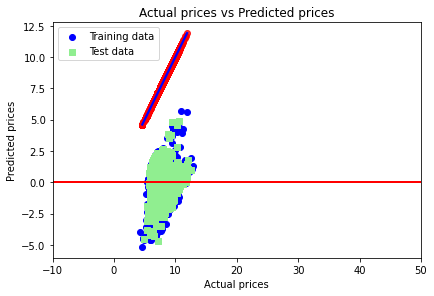

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

X = df.drop('price', axis=1)
y = df['price']
y = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

print('Train rmse:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Test rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

sns.regplot(y_test, y_test, color='red', line_kws={'color':'blue'})
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual prices vs Predicted prices')
plt.show()
